## **cse**-**221710309021**-**Ramani**

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

from keras.datasets.mnist import load_data

Using TensorFlow backend.


In [3]:
(train_digits,train_labels),(test_digits,test_labels)=load_data()
print(train_digits.shape)
print(test_digits.shape)

11493376/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [4]:

import pandas as pd
pd.Series(train_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Length: 60000, dtype: uint8>

In [5]:
pd.Series(test_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Length: 10000, dtype: uint8>

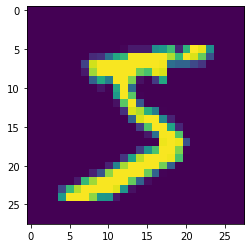

In [6]:
plt.imshow(train_digits[0])

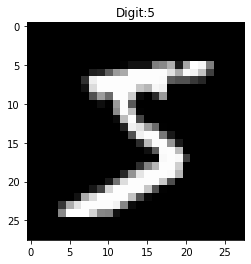

In [7]:
plt.title("Digit:"+str(train_labels[0]))
plt.imshow(train_digits[0],cmap="gray")


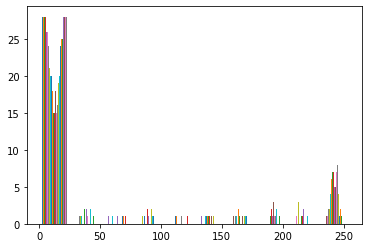

In [9]:

plt.hist(train_digits[0])
plt.show()

In [10]:
samp=np.random.randint(train_digits.shape[0],size=16)
samp

array([46875, 13137, 39745, 17390,  8054, 51164, 31139,  2411, 51844,
       42194, 25966,  7235, 20120,  9417, 23911, 43544])

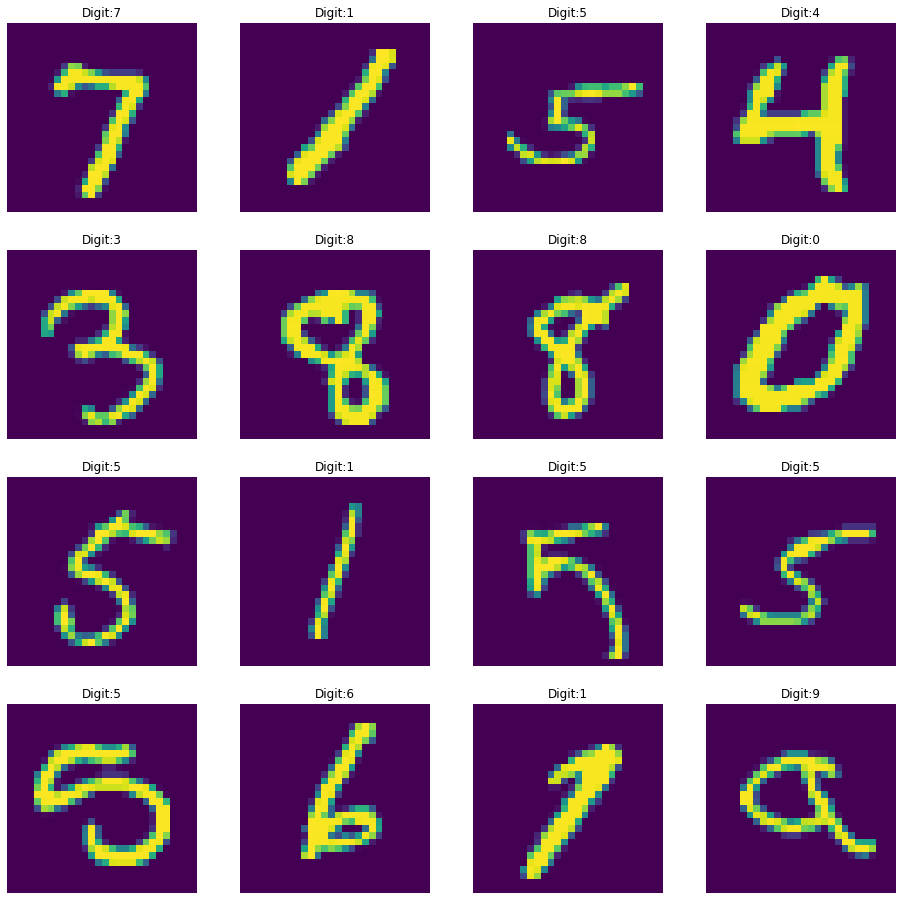

In [11]:
plt.figure(figsize=(16,16))
j=1
for i in samp:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i])
  plt.title("Digit:"+str(train_labels[i]))
  plt.axis("off")
  j=j+1

In [12]:
train_digits_sc=train_digits/255.0
test_digits_sc=test_digits/255.0

In [13]:

from keras.utils import to_categorical

In [14]:
train_labels_cat=to_categorical(train_labels)

In [15]:
test_labels_cat=to_categorical(test_labels)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(train_digits_sc,train_labels_cat,test_size=0.1,random_state=32)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)


(54000, 28, 28)
(6000, 28, 28)
(54000, 10)
(6000, 10)


In [17]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

model = Sequential()
# first layer we need to mention the input shape

model.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model.add(Dense(128,activation='relu'))# 784 * 128+128
model.add(Dense(128,activation='relu'))# 
model.add(Dense(64,activation='relu'))
model.add(Dense(256,activation='relu'))
#Final layer
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 144,458
Trainable params: 144,458
Non-trainable params: 0
________________________________________________

In [18]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [19]:
history=model.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 6s 104us/step - loss: 0.2457 - accuracy: 0.9237 - val_loss: 0.1455 - val_accuracy: 0.9583
Epoch 2/5
54000/54000 [==============================] - 5s 97us/step - loss: 0.1091 - accuracy: 0.9661 - val_loss: 0.1022 - val_accuracy: 0.9707
Epoch 3/5
54000/54000 [==============================] - 5s 102us/step - loss: 0.0799 - accuracy: 0.9747 - val_loss: 0.1155 - val_accuracy: 0.9668
Epoch 4/5
54000/54000 [==============================] - 5s 99us/step - loss: 0.0644 - accuracy: 0.9797 - val_loss: 0.0883 - val_accuracy: 0.9767
Epoch 5/5
54000/54000 [==============================] - 5s 97us/step - loss: 0.0537 - accuracy: 0.9833 - val_loss: 0.1062 - val_accuracy: 0.9722


In [20]:
model.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 26us/step


[0.10511180375332478, 0.97079998254776]

In [21]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [22]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[1.7412969e-09, 2.1270407e-06, 4.9475834e-06, 3.9176921e-06,
        2.5760629e-09, 4.9345048e-09, 1.5495370e-12, 9.9998724e-01,
        1.3613693e-08, 1.6099611e-06]], dtype=float32)

In [23]:
model.predict(test_digits_sc[:10])

array([[1.74129022e-09, 2.12703458e-06, 4.94756478e-06, 3.91768117e-06,
        2.57605803e-09, 4.93449548e-09, 1.54953697e-12, 9.99987245e-01,
        1.36136418e-08, 1.60995648e-06],
       [1.84778557e-07, 6.90325178e-05, 9.99910116e-01, 1.17799482e-05,
        1.35922775e-08, 7.76375941e-08, 9.88528370e-09, 8.25920779e-06,
        5.07970299e-07, 1.34776490e-09],
       [1.66381355e-07, 9.99910951e-01, 3.44724049e-06, 9.76135652e-08,
        3.18671118e-06, 2.18509868e-07, 2.68596591e-06, 3.79347475e-05,
        4.08295964e-05, 4.39412901e-07],
       [9.99954581e-01, 3.37573591e-09, 9.22797142e-07, 2.58675783e-08,
        4.63635530e-07, 1.90791951e-08, 2.48742595e-06, 1.19834937e-07,
        6.41548894e-08, 4.12783884e-05],
       [3.02764080e-09, 2.87475155e-10, 1.78531798e-06, 1.08679221e-09,
        9.99809444e-01, 4.30010971e-07, 5.81879434e-08, 1.77743011e-08,
        2.74142820e-10, 1.88364604e-04],
       [2.73920908e-09, 9.99994755e-01, 8.86558453e-08, 1.10409237e-09,
   

In [24]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))


array([7])

In [25]:

model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[1.7412969e-09, 2.1270407e-06, 4.9475834e-06, 3.9176921e-06,
        2.5760629e-09, 4.9345048e-09, 1.5495370e-12, 9.9998724e-01,
        1.3613693e-08, 1.6099611e-06]], dtype=float32)

In [26]:
history.history

{'accuracy': [0.92366666, 0.96614814, 0.9747222, 0.97966665, 0.98325926],
 'loss': [0.24572353314001252,
  0.10911675610724422,
  0.07992770400382923,
  0.06442210323937858,
  0.05373123055611547],
 'val_accuracy': [0.9583333134651184,
  0.9706666469573975,
  0.9668333530426025,
  0.9766666889190674,
  0.9721666574478149],
 'val_loss': [0.14551646004120508,
  0.10220097087572018,
  0.11547662619252999,
  0.08832925317498545,
  0.10623527992330492]}

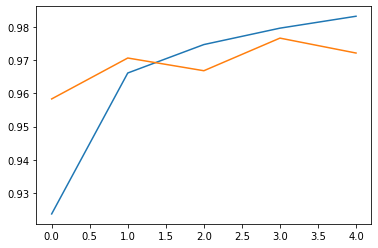

In [27]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [28]:
model1 = Sequential()
# first layer we need to mention the input shape

model1.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model1.add(Dense(128,activation='relu'))# 784 * 128+128
model1.add(Dense(256,activation='relu'))# 
model1.add(Dense(64,activation='relu'))
model1.add(Dense(256,activation='relu'))
#Final layer
model1.add(Dense(10,activation='sigmoid'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 169,162
Trainable params: 169,162
Non-trainable params: 0
________________________________________________

In [29]:
model1.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [30]:
history=model1.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)


Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 6s 120us/step - loss: 0.2621 - accuracy: 0.9210 - val_loss: 0.1474 - val_accuracy: 0.9597
Epoch 2/5
54000/54000 [==============================] - 6s 113us/step - loss: 0.1115 - accuracy: 0.9666 - val_loss: 0.1354 - val_accuracy: 0.9605
Epoch 3/5
54000/54000 [==============================] - 6s 112us/step - loss: 0.0806 - accuracy: 0.9754 - val_loss: 0.1070 - val_accuracy: 0.9713
Epoch 4/5
54000/54000 [==============================] - 6s 110us/step - loss: 0.0639 - accuracy: 0.9806 - val_loss: 0.0928 - val_accuracy: 0.9750
Epoch 5/5
54000/54000 [==============================] - 6s 110us/step - loss: 0.0525 - accuracy: 0.9837 - val_loss: 0.0960 - val_accuracy: 0.9770


In [31]:
model1.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 26us/step


[0.0882725809425814, 0.9765999913215637]

In [32]:

print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [33]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[1.7412969e-09, 2.1270407e-06, 4.9475834e-06, 3.9176921e-06,
        2.5760629e-09, 4.9345048e-09, 1.5495370e-12, 9.9998724e-01,
        1.3613693e-08, 1.6099611e-06]], dtype=float32)

In [34]:
model.predict(test_digits_sc[:10])

array([[1.74129022e-09, 2.12703458e-06, 4.94756478e-06, 3.91768117e-06,
        2.57605803e-09, 4.93449548e-09, 1.54953697e-12, 9.99987245e-01,
        1.36136418e-08, 1.60995648e-06],
       [1.84778557e-07, 6.90325178e-05, 9.99910116e-01, 1.17799482e-05,
        1.35922775e-08, 7.76375941e-08, 9.88528370e-09, 8.25920779e-06,
        5.07970299e-07, 1.34776490e-09],
       [1.66381355e-07, 9.99910951e-01, 3.44724049e-06, 9.76135652e-08,
        3.18671118e-06, 2.18509868e-07, 2.68596591e-06, 3.79347475e-05,
        4.08295964e-05, 4.39412901e-07],
       [9.99954581e-01, 3.37573591e-09, 9.22797142e-07, 2.58675783e-08,
        4.63635530e-07, 1.90791951e-08, 2.48742595e-06, 1.19834937e-07,
        6.41548894e-08, 4.12783884e-05],
       [3.02764080e-09, 2.87475155e-10, 1.78531798e-06, 1.08679221e-09,
        9.99809444e-01, 4.30010971e-07, 5.81879434e-08, 1.77743011e-08,
        2.74142820e-10, 1.88364604e-04],
       [2.73920908e-09, 9.99994755e-01, 8.86558453e-08, 1.10409237e-09,
   

In [35]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [36]:

model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[1.7412969e-09, 2.1270407e-06, 4.9475834e-06, 3.9176921e-06,
        2.5760629e-09, 4.9345048e-09, 1.5495370e-12, 9.9998724e-01,
        1.3613693e-08, 1.6099611e-06]], dtype=float32)

In [37]:
history.history

{'accuracy': [0.920963, 0.9666296, 0.9753889, 0.9805741, 0.98370373],
 'loss': [0.2620910170781944,
  0.11148607025792201,
  0.08061093984378709,
  0.06394311106696518,
  0.0525047090903304],
 'val_accuracy': [0.9596666693687439,
  0.9605000019073486,
  0.9713333249092102,
  0.9750000238418579,
  0.9769999980926514],
 'val_loss': [0.14737068204085033,
  0.13540228171646596,
  0.10702177307754755,
  0.09277856133164217,
  0.0959954069556358]}

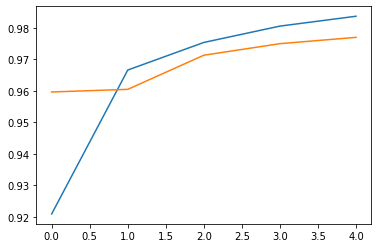

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])